In [1]:
# ----------------------------------------------------------------------------------------------------
# 라이브러리 목록

# 기본 라이브러리 
import pandas as pd

# 시각화 라이브러리 
import matplotlib
import matplotlib.pyplot as plt

# 개인 라이브러리 
from preparation_for_analysis.show_window import DataVisualizer

# pandas 설정
pd.set_option('display.max_rows', None)  # 모든 행 출력
pd.set_option('display.max_columns', None)  # 모든 열 출력

# matplotlib 설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우에서 사용하는 한글 폰트
matplotlib.rcParams['axes.unicode_minus'] = False  # 음수 기호 문제 해결

# preparation_for_analysis 설정
visualizer = DataVisualizer(line="=", length=100, start="#")
# ----------------------------------------------------------------------------------------------------

In [2]:
# ----------------------------------------------------------------------------------------------------
# learning 불러오기 
learning = pd.read_csv(
    "C:\\Users\\ssalt\\Documents\\ev_price_predict_project\\data\\train\\A_df\\c_learning\\1_learning.csv",
    sep=",",
    header=0
)

visualizer.show_df_info(title="learning.info", df=learning)
# ----------------------------------------------------------------------------------------------------


# Title: learning.info


# DataFrame Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6372 entries, 0 to 6371
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            6372 non-null   object 
 1   Model         6372 non-null   object 
 2   Manufacturer  6372 non-null   object 
 3   Model_year    6372 non-null   int64  
 4   Drivetrain    6372 non-null   object 
 5   Warranty      6372 non-null   int64  
 6   Accident      6372 non-null   object 
 7   Condition     6372 non-null   object 
 8   Battery       4064 non-null   float64
 9   Mileage       6372 non-null   int64  
 10  Price         6372 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 547.7+ KB







In [3]:
# ----------------------------------------------------------------------------------------------------
# 배터리 용량 결측치 확인 

# 결측치 비율
result = len(learning.loc[pd.isnull(learning["Battery"]),"Battery"]) / len(learning["Battery"])*100

# 비율 확인
visualizer.show_data(title="Battery Missing Ratio", data=result)
# ----------------------------------------------------------------------------------------------------


# Title: Battery Missing Ratio


# Data:

36.22096672944131







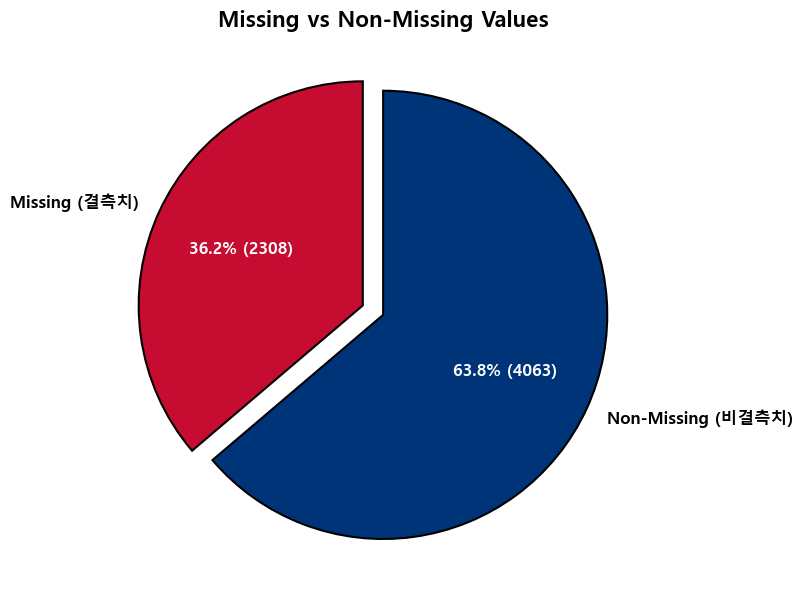

In [4]:
# ----------------------------------------------------------------------------------------------------
# 전체 데이터셋의 결측치와 비결측치 개수 계산
total_values = learning["Battery"].size
missing_values = learning["Battery"].isna().sum()  # 전체 결측치 개수
non_missing_values = total_values - missing_values  # 비결측치 개수

# 데이터 준비
labels = ["Missing (결측치)", "Non-Missing (비결측치)"]
sizes = [missing_values, non_missing_values]
colors = ["#C60C30", "#003478"]  # 빨간색: 결측치, 파란색: 비결측치
explode = [0.1, 0]  # 결측치 조각을 약간 분리하여 강조

# 파이 차트 시각화
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct=lambda p: f"{p:.1f}% ({int(p * total_values / 100)})",
    colors=colors,
    explode=explode,
    startangle=90,
    shadow=False,  # 입체 효과
    textprops={"fontsize": 12, "weight": "bold"},
    wedgeprops={"edgecolor": "black", "linewidth": 1.5}
)

# 텍스트 및 스타일 조정
for autotext in autotexts:
    autotext.set_color("white")  # 조각 내부 텍스트 색상을 흰색으로 설정

# 그래프 제목 추가
ax.set_title("Missing vs Non-Missing Values", fontsize=16, weight="bold")

# 그래프 표시
plt.tight_layout()
plt.show()
# ----------------------------------------------------------------------------------------------------

In [ ]:
# ----------------------------------------------------------------------------------------------------
# 결측치 비율이 36%로 낮은 수치는 아님 
# 결측치를 보충하기 위해 eda 후 결측치 보충 
# ----------------------------------------------------------------------------------------------------